In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as creature
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [2]:
#load the datafile provided by the Albert Kahn Museum
df = pd.read_csv('kahn.csv')

In [3]:
#show a random sample of 10 entries
df.sample(10)

,Unnamed: 0,Identifiant Fakir,Numéro d'inventaire,Légende d'origine,Légende,Lieu ancien,Date de prise de vue,Opérateur,Mission,Lieux,...,Libre de droits,Continent,Région,Pays,Département,Ville,Photo,Geo Point,Lieu,filename
4346,4346,IF75286,A 38 013,"France, Fismes, L'Eglise",NaN,"Fismes, France",28 mars 1923,Frédéric Gadmer,Mission Frédéric Gadmer dans les régions en re...,Fismes (Marne / Champagne-Ardenne / France / E...,...,NaN,Europe,NaN,France,Marne,Fismes,https://opendata.hauts-de-seine.fr/api/v2/cata...,"49.3073229,3.6803039999999783","Europe, France, Marne, Fismes",d7f0fcb45320627cc78035b37cef1a75.jpg
29920,29920,IF39870,A 7 453,"France, Paris, Quai de la Tournelle",Vue sur les rues du Maître-Albert et des Grand...,"Paris (Ve arr.), France",29 juin 1914,Stéphane Passet,NaN,Arrondissement V (Paris / Ile-de-France / Fran...,...,NaN,Europe,NaN,France,Paris,Paris,https://opendata.hauts-de-seine.fr/api/v2/cata...,"48.8434912,2.351833899999974","Europe, France, Paris",f3d8336e30907ab33adc3808436cc4eb.jpg
2521,2521,IF51406,A 59 547,"France, Paris, Obsèques de Mr Myron Herrick - ...",Les funérailles de l'ambassadeur des États-Uni...,"Paris (VIIe arr.), France",3 avril 1929,Stéphane Passet,NaN,"Etats-Unis [en relation avec] (Amérique), Arro...",...,NaN,Europe,NaN,France,Paris,Paris,https://opendata.hauts-de-seine.fr/api/v2/cata...,"48.85433450000001,2.3134029000000282","Europe, France, Paris",4783fde2e88a35f485c5dad462085b79.jpg
57986,57986,IF89534,A 48 730,"Canada, Niagara, Chute Canadienne (ensemble)",NaN,"Les chutes du Niagara, Canada",15 avril 1926,Frédéric Gadmer,Mission Frédéric Gadmer et Jean Brunhes au Canada,"Niagara (fleuve) (Canada / Amérique), Etats-Un...",...,NaN,Amérique,NaN,Canada,NaN,NaN,https://opendata.hauts-de-seine.fr/api/v2/cata...,"43.075726,-79.074891","Amérique, Canada, Niagara (fleuve)",18d358c84033c0769600c9871862726a.jpg
38172,38172,IF79755,A 72 639,NaN,NaN,"Masevaux, Haut-Rhin, Alsace, France",26 mai 1918,Georges Chevalier,Mission Jean Brunhes et Georges Chevalier en A...,Masevaux (Haut-Rhin / Alsace / France / Europe),...,NaN,Europe,NaN,France,Haut-Rhin,Masevaux,https://opendata.hauts-de-seine.fr/api/v2/cata...,"47.774558,6.996478000000025","Europe, France, Haut-Rhin, Masevaux",63d437d6116f967b9bf1030227f0b711.jpg
31203,31203,IF128802,A 24 594,"France, St Cloud, Parc de St Cloud",NaN,"Saint-Cloud, France",6 octobre 1920,Roger Dumas,NaN,Saint-Cloud (Hauts-de-Seine / Ile-de-France / ...,...,NaN,Europe,NaN,France,Hauts-de-Seine,Saint-Cloud,https://opendata.hauts-de-seine.fr/api/v2/cata...,"48.84764699999999,2.2081150000000207","Europe, France, Hauts-de-Seine, Saint-Cloud",41ad21bd95c3ece3135d78e4abb4b39a.jpg
29346,29346,IF85936,A 48 143,"France, Le Cap-Martin , Soleil Couchant",Végétation se découpant à contre-jour dans le ...,"Cap Martin, France",janvier 1926,Roger Dumas,1926 - Cap Martin - Roger Dumas - (janvier),Roquebrune-Cap-Martin (Alpes-Maritimes / Prove...,...,NaN,Europe,NaN,France,Alpes-Maritimes,Roquebrune-Cap-Martin,https://opendata.hauts-de-seine.fr/api/v2/cata...,"43.757808,7.473753999999985","Europe, France, Alpes-Maritimes, Roquebrune-Ca...",b5314eab52b963539139a7169be2b625.jpg
36517,36517,IF105459,A 50 295,"France, Chivres, Vue vers le monumt aux morts",NaN,"Chivres, Aisne, France",15 septembre 1926,Frédéric Gadmer,Mission Frédéric Gadmer dans les zones en reco...,Chivres-Val (Aisne / Picardie / France / Europe),...,NaN,Europe,NaN,France,Aisne,Chivres-Val,https://opendata.hauts-de-seine.fr/api/v2/cata...,"49.404687,3.437080000000037","Europe, France, Aisne, Chivres-Val",52715cd210568bc82e82007bdf265b1f.jpg
14598,14598,IF3136,A 29 958,"Syrie, Alep, Mosquée Barkamich",Mosquée Bahramiyya (?),"Alep, Syrie",24 octobre 1921,Frédéric Gadmer,Mission Jean Brunhes et Frédéric Gadmer au Lib...,Alep (Syrie / Proche-Orient / Asie),...,NaN,Asie,Proche-Orient,Syrie,NaN,Alep,https://opendata.hauts-de-seine.fr/api/v2/cata...,"36.2021047,37.13426030000005","Asie, Syrie, Alep",81511ad32b87af888ed1496ead81

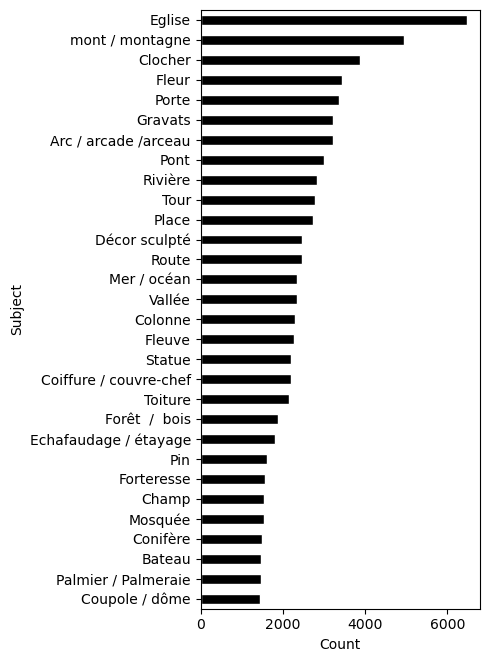

In [17]:
# Create a new figure and axis with a specific size. 
# The size is defined by the 'figsize' parameter, which specifies the width and height of the figure in inches.
fig, ax = plt.subplots(figsize=(5, 7))  # Change these values as required

# The following line performs several operations:
# 1. Split the 'Sujets' column values by ', ' (assuming each subject in 'Sujets' is comma-separated).
# 2. "Explode" the lists so each subject gets its own row.
# 3. Count the occurrences of each subject.
# 4. Select the top 30 subjects with the highest counts.
top_50_sujets = df['Sujets'].str.split(', ').explode().value_counts().nlargest(30)

# Plot the counts of the top 30 subjects in a horizontal bar chart. 
# The data is reversed with [::-1] to have the subject with the highest count at the bottom.
top_50_sujets[::-1].plot.barh(ax=ax, color='black', edgecolor='white')

# Set the labels for the x and y axes
ax.set_xlabel('Count')  # x-axis represents the count of occurrences
ax.set_ylabel('Subject')  # y-axis represents the subjects

# Set the main title for the figure
ax.set_title('30 most frequent subjects in the Archives of the Planet')

# Adjust the display to make sure everything fits nicely and there's no overlap of labels and title.
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Save the plot as an image with a specific resolution (dpi). 
# 'bbox_inches' ensures that the entire plot, including labels and legends, is saved.
plt.savefig('TableSujets.png', dpi=300, bbox_inches='tight')

# Display the figure in the output. In a Jupyter Notebook or similar environment, this would show the plot directly.
plt.show()

In [25]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [29]:
# Count the occurrences of each country
country_count = df['Pays'].value_counts().reset_index()
country_count.columns = ['Pays', 'Count']

# Get the top 20 countries
top_20_countries = country_count.head(60)

# Calculate the percentage and round to the nearest integer
total_count = len(df)
top_20_countries['Percentage'] = round((top_20_countries['Count'] / total_count) * 100).astype(int)

print(top_20_countries)

# Save to Excel
top_20_countries.to_excel("top_20_countries.xlsx", index=False, sheet_name='Top 20 Countries')


                    Pays  Count  Percentage
0                 France  38437          59
1                  Japon   2443           4
2               Belgique   1915           3
3                  Grèce   1812           3
4                Turquie   1622           2
5                 Suisse   1479           2
6              Allemagne   1301           2
7            Afghanistan   1194           2
8                Algérie   1177           2
9                 Italie   1168           2
10                  Iran   1109           2
11                  Inde   1085           2
12                 Bénin   1048           2
13                 Maroc    859           1
14                Canada    846           1
15       Grande-Bretagne    825           1
16                Egypte    823           1
17                 Chine    750           1
18                  Irak    725           1
19               Espagne    670           1
20                 Syrie    589           1
21                 Liban    508 

/var/folders/mc/tb3lf_s11xn8vqdxfr288ly40000gn/T/ipykernel_10820/4172264210.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_20_countries['Percentage'] = round((top_20_countries['Count'] / total_count) * 100).astype(int)


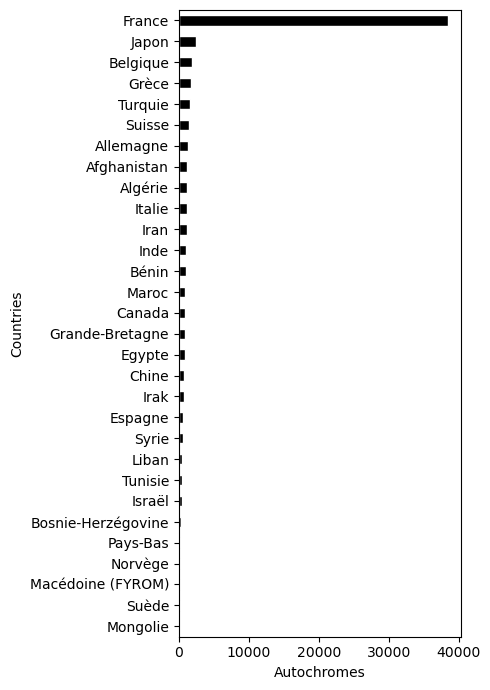

In [22]:
# Create a new figure and axis with the specified size.
# 'figsize' determines the width and height of the figure in inches.
fig, ax = plt.subplots(figsize=(5, 7))  # Change these values as required

# The following steps are performed for plotting:
# 1. Count occurrences of each unique value in the 'Pays' column (presumably representing countries).
# 2. Reverse the order of the data with [::-1].
# 3. Take the last (bottom) 30 data points with 'tail(30)'.
# 4. Plot these as a horizontal bar chart on the previously created axis (ax).
df['Pays'].value_counts()[::-1].tail(30).plot.barh(ax=ax, color='black', edgecolor='white')

# Set the labels for the x and y axes:
# x-axis will represent the count of "Autochromes" (a type of early color photograph).
# y-axis will represent the names of the countries.
ax.set_xlabel('Autochromes')
ax.set_ylabel('Countries')

# Adjust the display to ensure there's no overlap of labels, titles, or other elements.
plt.tight_layout()

# Save the figure as a PNG image file with the specified resolution (dots per inch).
plt.savefig('countriessimple.png', dpi=300)

# Display the plot. If this code is run in an interactive environment like Jupyter Notebook,
# the plot will be shown directly beneath the code cell.
plt.show()

In [47]:
# From the dataframe 'df', filter rows where the 'Pays' column value is 'France'.
# From these filtered rows, select the 'Ville' column, which presumably represents cities.
# Use the 'nunique()' method to count the number of unique cities (unique values) in this column.
unique_cities_in_france = df[df['Pays'] == 'France']['Ville'].nunique()

# Print the computed number of unique cities in France.
print(unique_cities_in_france)


1060


In [48]:
# Filter the original dataframe 'df' to include only rows where the 'Pays' column has the value 'France'.
df_france = df[df['Pays'] == 'France']

# Count the occurrences of each unique city in the 'Ville' column of the filtered dataframe.
# This returns a Series with cities as indices and their respective counts as values.
# Cities with the most occurrences will appear at the top.
city_counts = df_france['Ville'].value_counts()

Paris                     5404
Boulogne-Billancourt      4987
Roquebrune-Cap-Martin     1795
Reims                     1729
Soissons                   578
                          ... 
Gannat                       1
Notre-Dame-de-l'Isle         1
Estrée-Cauchy                1
Saint-Wandrille-Rançon       1
Marcadau [vallée]            1
Name: Ville, Length: 1060, dtype: int64

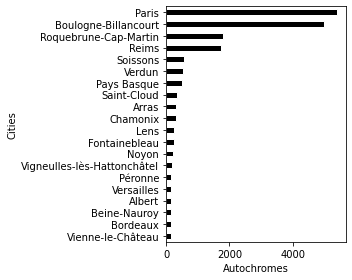

In [50]:
# Filter the original dataframe 'df' to only include rows where the 'Pays' column has the value 'France'.
df_france = df[df['Pays'] == 'France']

# Create a new figure and axis with the specified size.
fig, ax = plt.subplots(figsize=(5, 4))  # The size is given as width x height in inches

# Count the occurrences of each unique city in the 'Ville' column of the filtered dataframe.
# Reverse the order of the cities so that the city with the highest count is at the bottom.
# Select only the last 20 cities (those with the highest counts) and plot them as a horizontal bar chart.
df_france['Ville'].value_counts()[::-1].tail(20).plot.barh(ax=ax, color='black', edgecolor='white')

# Label the x and y axes:
# x-axis represents the count of "Autochromes"
# y-axis represents the names of the cities
ax.set_xlabel('Autochromes')
ax.set_ylabel('Cities')

# Adjust the display of the plot so that everything fits without overlapping.
plt.tight_layout()

# Save the figure as a PNG image file with a specific resolution (300 dots per inch).
plt.savefig('FranceCitiesSimple.png', dpi=300)

# Display the plot, which is particularly useful in interactive environments like Jupyter Notebooks.
plt.show()

In [52]:
#percentages
counts1 = df_france['Ville'].value_counts()
total1 = counts1.sum()
percentages1 = (counts1 / total1) * 100
percentages1

Paris                     14.295918
Boulogne-Billancourt      13.192773
Roquebrune-Cap-Martin      4.748552
Reims                      4.573953
Soissons                   1.529060
                            ...    
Gannat                     0.002645
Notre-Dame-de-l'Isle       0.002645
Estrée-Cauchy              0.002645
Saint-Wandrille-Rançon     0.002645
Marcadau [vallée]          0.002645
Name: Ville, Length: 1060, dtype: float64

In [54]:
df['Continent'].value_counts()

Europe      49065
Asie        10793
Afrique      4326
Amérique      899
Name: Continent, dtype: int64

In [6]:
# Split the 'Geo Point' column into two columns based on the comma delimiter.
# 'expand=True' returns a DataFrame which is then assigned to two new columns: 'lat' and 'lon'.
df[['lat', 'lon']] = df['Geo Point'].str.split(',', expand=True)

# Convert the 'lon' (longitude) column to numeric datatype.
# If any values are not valid numbers, they will be converted to NaN (handled gracefully without raising errors).
df['lon'] = pd.to_numeric(df['lon'], errors='coerce')

# Convert the 'lat' (latitude) column to numeric datatype.
# As with the 'lon' column, invalid values will be converted to NaN.
df['lat'] = pd.to_numeric(df['lat'], errors='coerce')

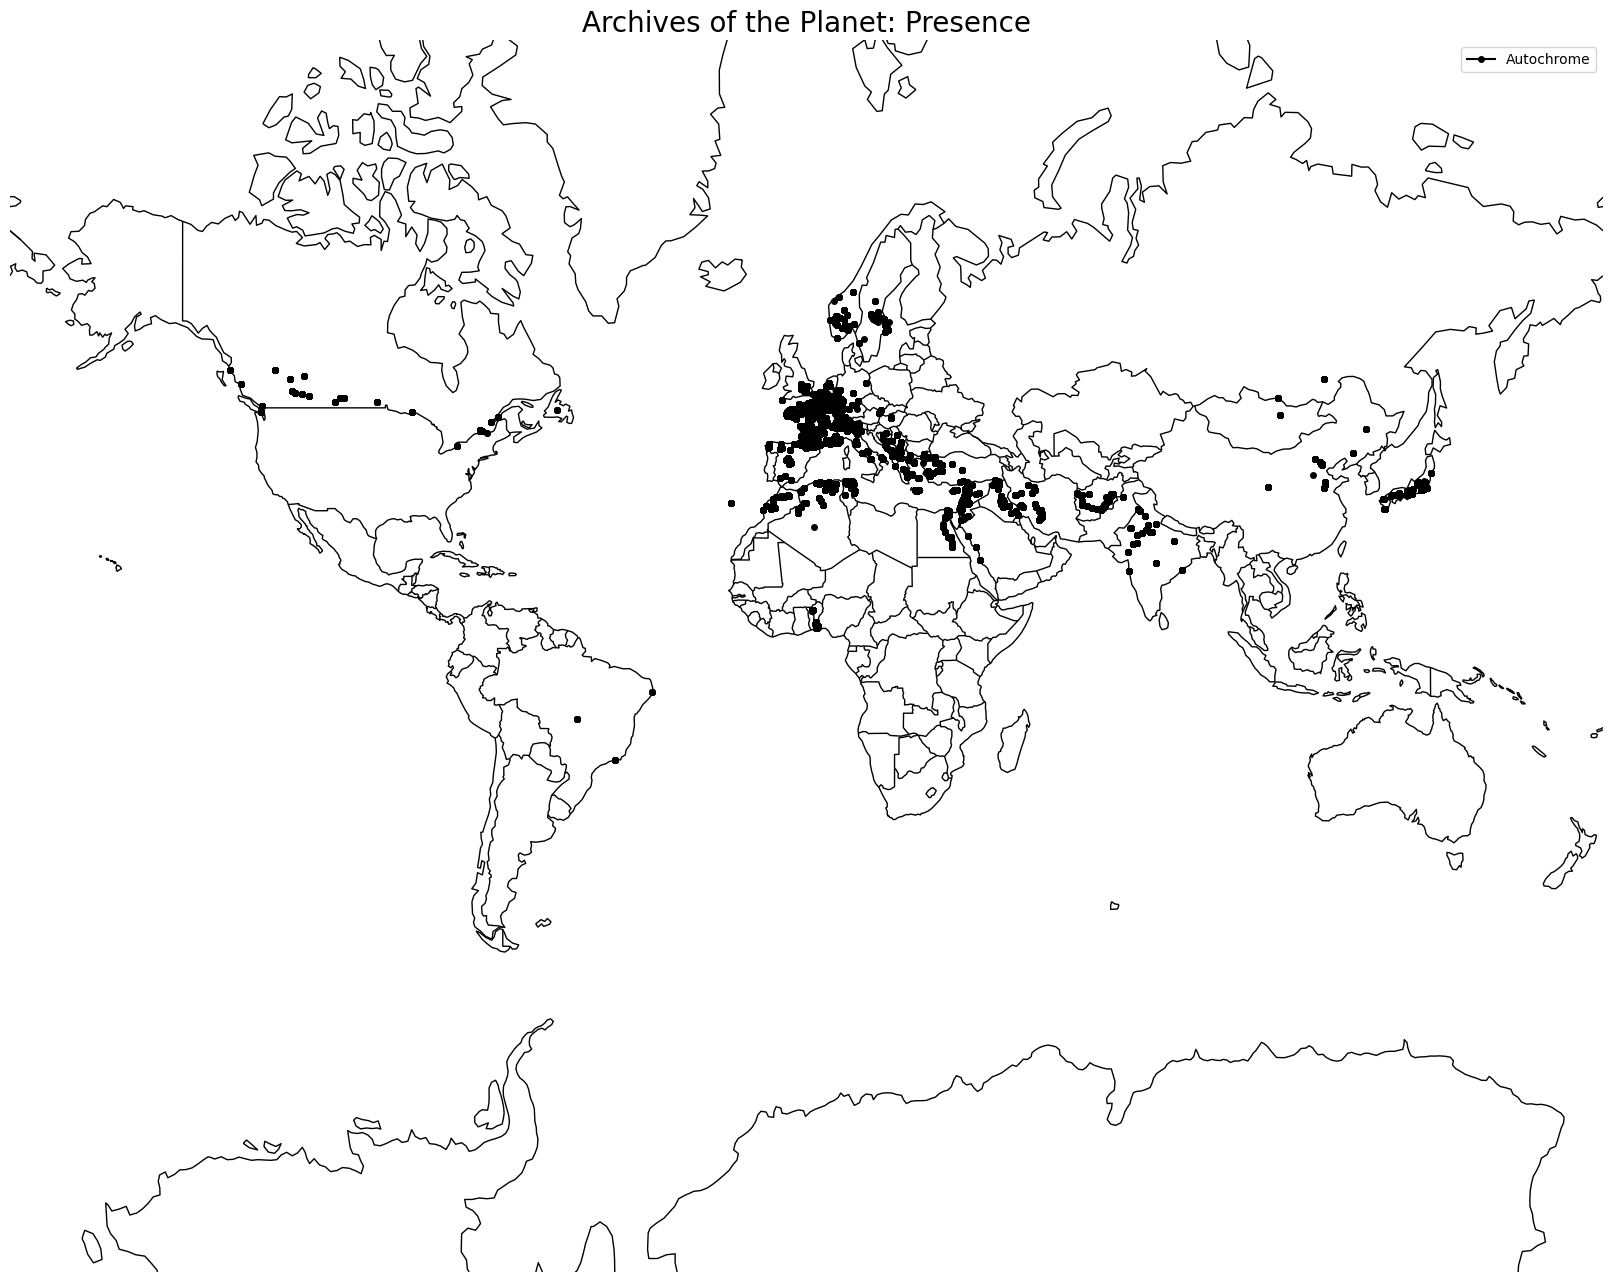

In [30]:
# Initialize a figure with a specified size
fig = plt.figure(figsize=(32, 16))

# Add a subplot with Mercator projection; frame_on=False removes the frame
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(), frame_on=False)

# Set the extent for the map (longitude and latitude bounds)
ax.set_extent([-180, 180, -80, 80])

# Set the color of continents and lakes to white 
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.LAKES, facecolor='white')

# Plot the coastlines and national borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS)

# Plot the photographs' locations as black markers on the map
for index, row in df.iterrows():
    ax.plot(row['lon'], row['lat'], marker='o', color='black', markersize=4, transform=ccrs.PlateCarree())

# Set the background color of the entire figure to white
fig.patch.set_facecolor('white')

# Add a title to the map
plt.title('Archives of the Planet: Presence', fontsize=20)

# Add a legend to the map
ax.legend(['Autochrome'], loc='upper right')

# Save the map as an image with a specified resolution
plt.savefig('world_white.png', dpi=300, bbox_inches='tight')

# Display the map
plt.show()

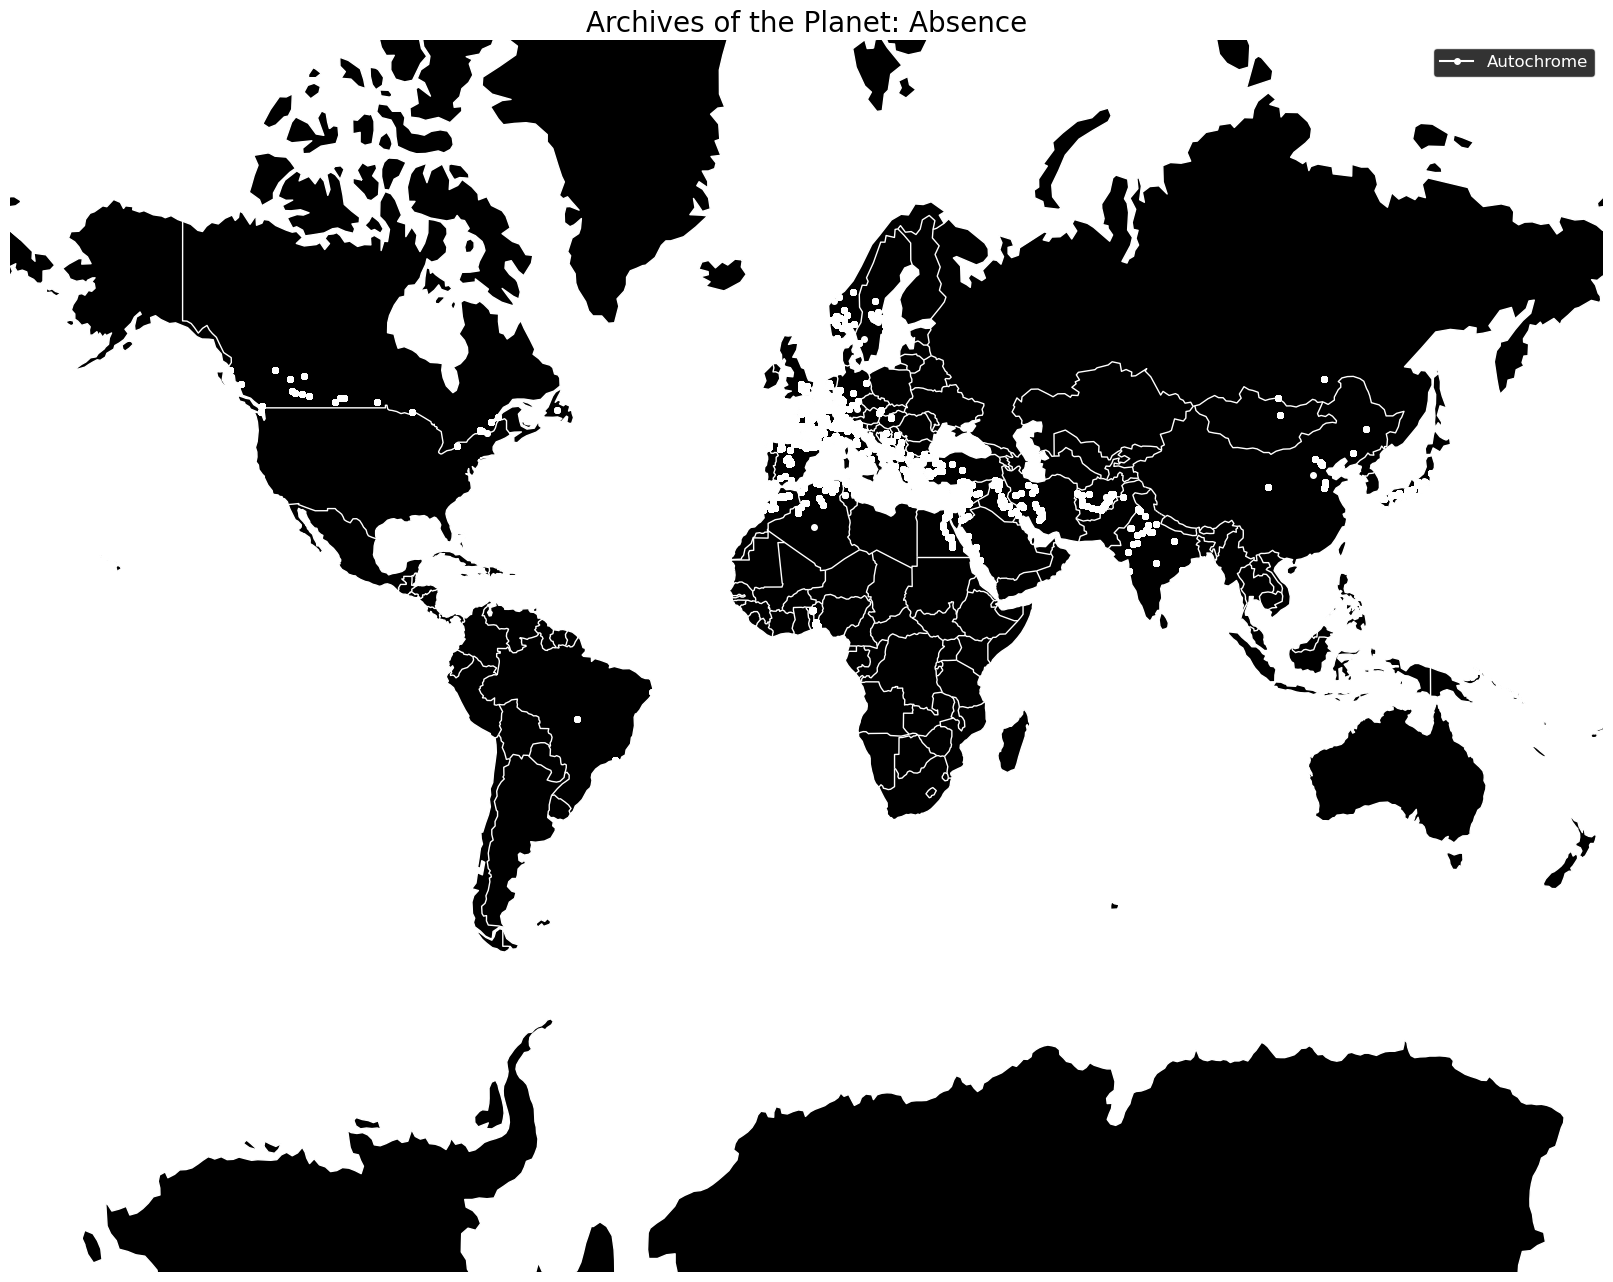

In [29]:
#Does the same as above but with the colors reversed.

fig = plt.figure(figsize=(32, 16))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(), frame_on=False)

# Set extent for the map
ax.set_extent([-180, 180, -80, 80])

# Set the color of the continents and lakes
ax.add_feature(cfeature.LAND, facecolor='black')
ax.add_feature(cfeature.LAKES, facecolor='black')

# Plot the coastlines and countries
ax.coastlines(color='white')  # Set coastlines to white
ax.add_feature(cfeature.BORDERS, edgecolor='white')  # Set country borders to white

# Plot the markers
for index, row in df.iterrows():
    ax.plot(row['lon'], row['lat'], marker='o', color='white', markersize=4, transform=ccrs.PlateCarree())

# Background, title, and legend
fig.patch.set_facecolor('white')  # Changed to black to match the black continents
plt.title('Archives of the Planet: Absence', fontsize=20, color='black')
ax.legend(['Autochrome'], loc='upper right', facecolor='black', edgecolor='white', fontsize=12, labelcolor='white')

# Save and show the plot
plt.savefig('world_black.png', dpi=300, bbox_inches='tight', facecolor=fig.get_facecolor())
plt.show()

/Users/thomassmits/miniforge3/envs/clipumap/lib/python3.11/site-packages/shapely/constructive.py:181: RuntimeWarning: invalid value encountered in buffer
  return lib.buffer(
/Users/thomassmits/miniforge3/envs/clipumap/lib/python3.11/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


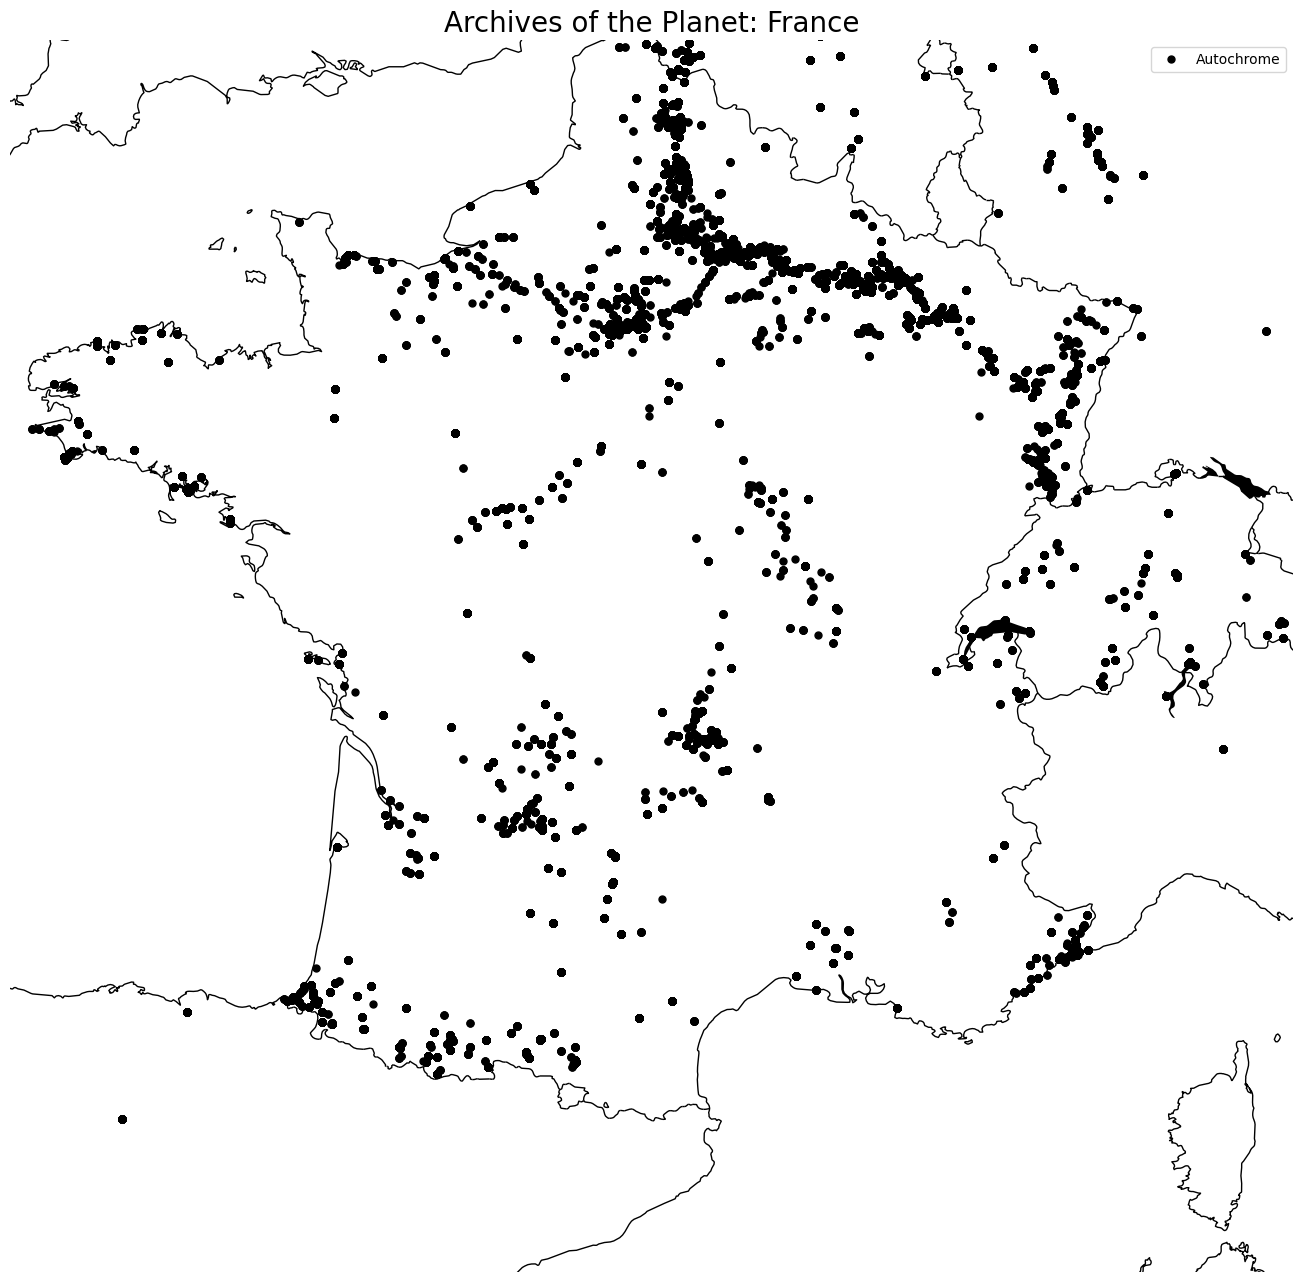

In [31]:
#the same as above but for France

fig = plt.figure(figsize=(32, 16))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(), frame_on=False)

# Set extent to cover France. Adjust as necessary for desired view.
ax.set_extent([-5, 10, 41, 51])

# Set the color of the continents (including France) to white
ax.add_feature(cfeature.LAND, facecolor='white')
ax.add_feature(cfeature.LAKES, facecolor='black')

# Plot the coastlines and countries in black
ax.coastlines(color='black')
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Plot the photographs as black markers on the map
for index, row in df.iterrows():
    ax.plot(row['lon'], row['lat'], 'ko', transform=ccrs.PlateCarree(), markersize=5)

# Set the background color of the figure to white
# Set the background color of the figure (this will cover the whole map area) to white
# Background, title, and legend
fig.patch.set_facecolor('white')
plt.title('Archives of the Planet: France', fontsize=20)
ax.legend(['Autochrome'], loc='upper right')

# Save the figure
plt.savefig('france.png', dpi=300, bbox_inches='tight')

# Show the map
plt.show()

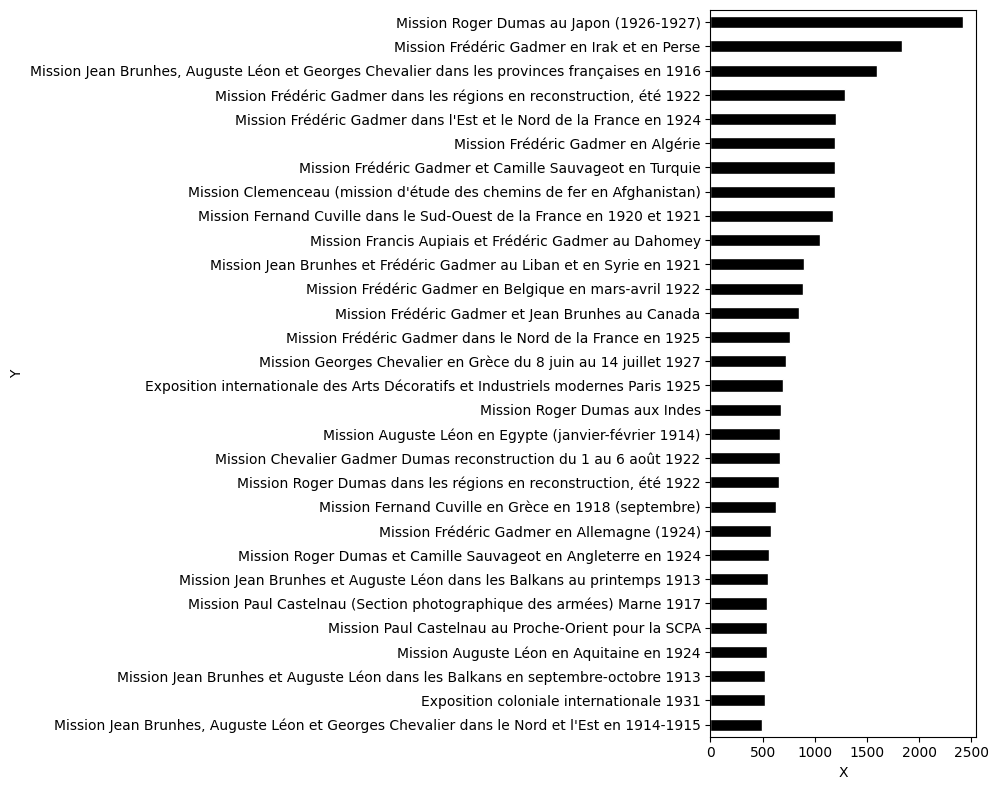

In [53]:
# missions
# Specify the figure size (width, height)
fig, ax = plt.subplots(figsize=(10, 8))  # Change these values as required

# Plot the data
df['Mission'].value_counts()[::-1].tail(30).plot.barh(ax=ax, color='black', edgecolor='white')

# Set titles for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Adjust the display
plt.tight_layout()

# Save the figure
plt.savefig('Mission.png', dpi=300)

# Display the plot
plt.show()